<a href="https://colab.research.google.com/github/maha-alarifi/Aligatou_AI/blob/master/Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Welcome to Algatou_AI's Image Segmentation Impelmentation 
In this project we used the K-Mean model to cluster the images colores to have more abstract images.

In [0]:
from skimage.color import rgb2gray
import os
import glob
from PIL import Image
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import ndimage
from sklearn.cluster import KMeans

In [0]:
directory = os.fsencode("/content/drive/My Drive/AiDataset_February_21/largeDataset/Ai-Pattern/*.png")

In [0]:
links = glob.glob(directory)
imgs = []
c = []

In [0]:
len(links)

45

##Segmentation Recursive Method
This recursive method takes two arraies, one with all the images and the other one is empty.  with each recursive call, the frist array is cut by one element. Until the last elemnt, the recursive call returns an array with segmented images.

In [0]:
def recursive_segmetation (a, b): #(a)is the array with the paths to the images (b)is the empty array to store the segmented images
  #process the image a[0]
  x = plt.imread(a[0].decode()) #read the image
  x_n = x.reshape(x.shape[0]*x.shape[1], x.shape[2]) #flatten the image

  for i in range(2,4): #Getting two styles of segmentation for the image a[0],  2 clusters and 3custers
    print('fitting the k-mean '+ str(i))
    kmeans = KMeans(n_clusters=i, random_state=0).fit(x_n)
    pic2show = kmeans.cluster_centers_[kmeans.labels_]
    cluster_pic = pic2show.reshape(x.shape[0], x.shape[1], x.shape[2])
    b.append(cluster_pic)

  if len(a) == 1: #if there is only one image in the array, return b
    print('break statment')
    return b
  else : # if there are more than one image in the array recursive call 
    print('recursive call')
    print(len(a))
    return recursive_segmetation(a[1:], b)


In [0]:
n = 0; # to handel the array with indexces not multiplay of 10s

# I broke the array to batches of 10s 
# in ordere to handel the recursive method weight
for i in range((len(links)-10)): 
  if ((i+10) < len(links)):
    n = 10;
  else:
    n = (len(links))-i;
  print("batch #"+str(i))
  c.append(recursive_segmetation(links[i:(i+n)],imgs))
  !kill -9 -1

batch #0
fitting the k-mean 2
fitting the k-mean 3
recursive call
10
fitting the k-mean 2
fitting the k-mean 3
recursive call
9
fitting the k-mean 2
fitting the k-mean 3
recursive call
8
fitting the k-mean 2
fitting the k-mean 3
recursive call
7
fitting the k-mean 2
fitting the k-mean 3
recursive call
6
fitting the k-mean 2
fitting the k-mean 3
recursive call
5
fitting the k-mean 2
fitting the k-mean 3
recursive call
4
fitting the k-mean 2
fitting the k-mean 3
recursive call
3
fitting the k-mean 2
fitting the k-mean 3
recursive call
2
fitting the k-mean 2
fitting the k-mean 3


##Export the Segmented Images

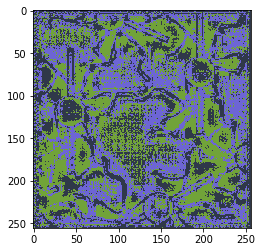

In [0]:
for i in range(len(c)):
  img = Image.fromarray((c[i-232] * 255).astype(np.uint8))
  img.save('/content/drive/My Drive/AiDataset_February_21/segments/S_{:04d}.png'.format(i))